In [1]:
import io
import eval_test
from PIL import Image

Using TensorFlow backend.


In [1]:
fileName = "/Users/samirantonio/Downloads/test.png"
with open(fileName, mode='rb') as file: # b is important -> binary
    fileContent = file.read()

In [6]:

stream = io.BytesIO(fileContent)


In [9]:
img = Image.open(stream)

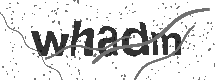

In [10]:
img